# Car Price Prediction

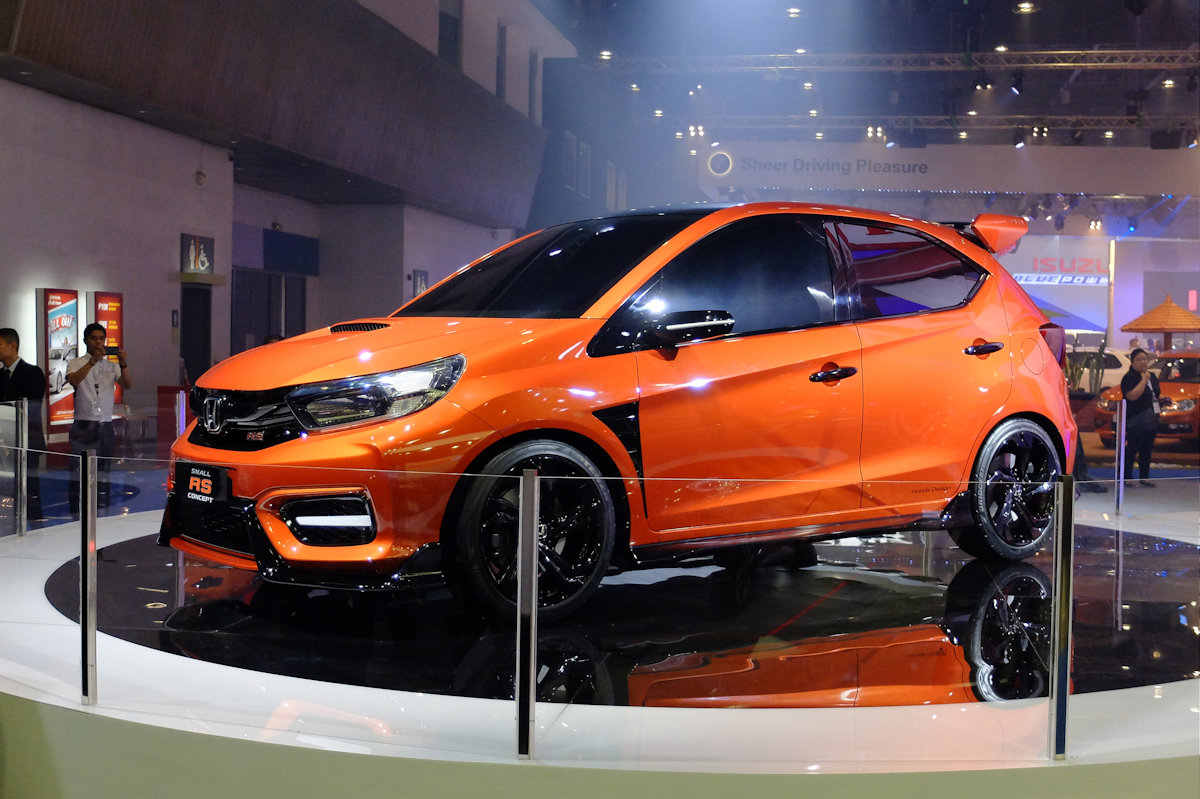

## Objective: To help company to buy and sell car with Good Condition

## Introduction

### This dataset contains information about used cars listed on  www.cardekho.com  This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.

# Importing libraries

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

from statsmodels.stats import weightstats
import scipy.stats as stats

import statsmodels.stats.oneway as oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

from sklearn.model_selection import train_test_split

import statsmodels.api as sa
import statsmodels.formula.api as sfm

# Loading dataset

In [2]:
data= pd.read_csv('car data.csv')

In [3]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


# Cleaning Data

In [4]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
print('Number of Rows are   : ',data.shape[0])
print('Number of Columns are: ',data.shape[1])

Number of Rows are   :  301
Number of Columns are:  9


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


### Interpritation: We can see in above table that our data contains three different data types.
###                         2-float coulmns ,3-int columns, 4-obj columns 


In [7]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

#### Interpritation: we can see here our data does not contains any Null values.

In [8]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

# Encoding Columns

In [9]:
# encoding "Fuel_Type" Column
data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [10]:
# checking the distribution of categorical data
print('\n' , data.Fuel_Type.value_counts())
print('\n' , data.Seller_Type.value_counts())
print('\n' ,data.Transmission.value_counts())
print('\n' ,data.Owner.value_counts())


 0    239
1     60
2      2
Name: Fuel_Type, dtype: int64

 0    195
1    106
Name: Seller_Type, dtype: int64

 0    261
1     40
Name: Transmission, dtype: int64

 0    290
1     10
3      1
Name: Owner, dtype: int64


In [11]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


# Descriptive Statistics

In [12]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.212625,0.352159,0.132890,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.425801,0.478439,0.340021,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000,0.000000,0.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000,1.000000,0.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,2.000000,1.000000,1.000000,3.000000


####  Interpritation: From the above table we can find  Min max Prices, Quartiles - 25% percentile etc.

In [13]:
data.Year.unique()

array([2014, 2013, 2017, 2011, 2018, 2015, 2016, 2009, 2010, 2012, 2003,
       2008, 2006, 2005, 2004, 2007], dtype=int64)

In [14]:
yesr_wise_cars=data.groupby(data['Year'])['Car_Name'].count()
yesr_wise_cars

Year
2003     2
2004     1
2005     4
2006     4
2007     2
2008     7
2009     6
2010    15
2011    19
2012    23
2013    33
2014    38
2015    61
2016    50
2017    35
2018     1
Name: Car_Name, dtype: int64

# Visualize Data

<AxesSubplot:>

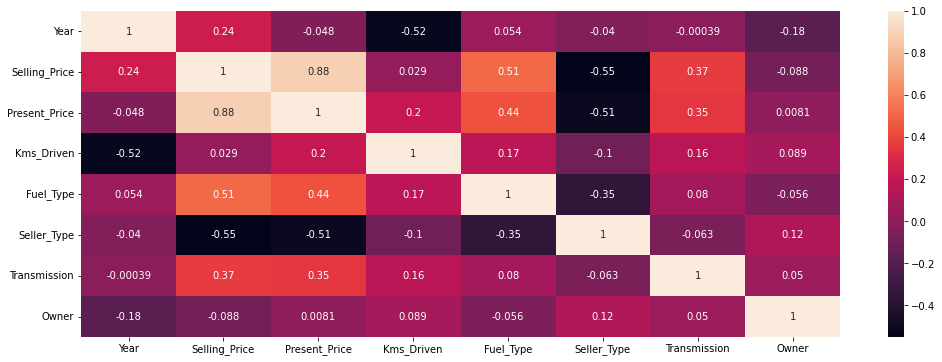

In [15]:
plt.figure(figsize=(17,6))
sns.heatmap(data.corr(),annot=True)

### Interpritation:
#### From above graph we can conclude that kms_Driven , Sellin price, present price, Year and seller type are negatively correlated to each other.

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


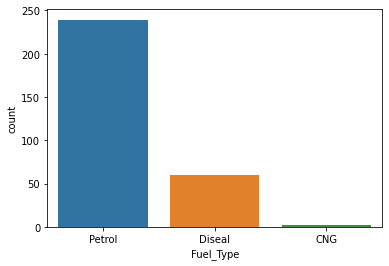

0    239
1     60
2      2
Name: Fuel_Type, dtype: int64


In [17]:
sns.countplot(data['Fuel_Type'])
plt.xticks([2,1,0],['CNG','Diseal','Petrol'])
plt.show()
a= data['Fuel_Type'].value_counts()
print(a)


# Hyptothesis testing
### Hypothesis testing on Selling Price and Present Price
#### WE are using Two sample Z test here to test the hypothesis

### Ho: Mean of SP = Mean of Presnt Price
### H1:  Mean of SP != Mean of Presnt Price
### alpha=0.05
### z0.025= -0.196 and +1.96

### Two tail test

In [19]:
sp_mean= data['Selling_Price'].mean()
sp_mean

4.661295681063127

In [20]:
sp_mean= data['Present_Price'].mean()
sp_mean

7.628471760797344

In [21]:
# Z-test fro two sample test
z_cal=weightstats.ztest(data['Selling_Price'],data['Present_Price'])
z_cal

(-5.133614000540439, 2.842307338723552e-07)

In [22]:
print('z_calculated: ',z_cal[0])
print('P-value     : ',z_cal[1])

z_calculated:  -5.133614000540439
P-value     :  2.842307338723552e-07


In [23]:
# Two tail test

if z_cal[0] < -1.96 or z_cal[0] > 1.96:

     print('Reject Ho')
else:

    print('Accept Ho')

Reject Ho


#### Ho: Mean of SP = Mean of Presnt Price
#### H1:  Mean of SP != Mean of Presnt Price

#### Hence we can conclude that mean price of Selling_price and Present price is not same

In [24]:
l=[]
for i in data.columns:
    l.append(i)

In [25]:
l

['Car_Name',
 'Year',
 'Selling_Price',
 'Present_Price',
 'Kms_Driven',
 'Fuel_Type',
 'Seller_Type',
 'Transmission',
 'Owner']

# ANOVA for all variables at 5% level of significance

### H0 (null hypothesis)       : μ1 = μ2 = μ3 = … = μk (It implies that the means of all the population are equal)
### H1 (alternative hypothesis): It states that there will be at least one population mean that differs from the rest

In [26]:
f_cal=stats.f_oneway(data['Selling_Price'],data['Present_Price'],data['Kms_Driven'],data['Fuel_Type'],data['Seller_Type'],data['Transmission'],data['Owner'])
f_cal

F_onewayResult(statistic=271.6891814042293, pvalue=1.1069356771865276e-257)

### F_stat=271.6891
### pvalue=1.1069356771865276e-257

#  Decision of Rejection or Acceptance

In [27]:
if f_cal[1]<0.05:
    print('Reject H0')
else:
    print('Accept H0')

Reject H0


### The F statistic and p-value turn out to be equal to 271.68  and 1.1069356771865276e-257 respectively.
### Since the p-value is less than 0.05 hence we would reject the null hypothesis. 
### This implies that we have sufficient proof to say that there exists a difference. 

## ANOVA for Fuel_Type at 5% level of significance

##### H0: Mean selling Price of all types of fuel is same(μ1 = μ2 = μ3)
##### H1: At least one mean is differs

In [28]:
petrol = data[data['Fuel_Type']==0][['Selling_Price']]
diseal = data[data['Fuel_Type']==1][['Selling_Price']]
cng    = data[data['Fuel_Type']==2][['Selling_Price']]

In [29]:
p_val=stats.f_oneway(petrol,diseal,cng)
p_val

F_onewayResult(statistic=array([65.41489427]), pvalue=array([2.80392513e-24]))

In [30]:
if p_val[1] < 0.05:
    print('Reject Ho')
else:
    print('Accept H1')

Reject Ho


### Interpritation: We can clearly see that H0 is Rejected here.
###                         we can conclude that there is significant difference in mean. 

# Post hoc tests:

### ANOVA test checks whether a difference in the average somewhere in the model or not (checking whether there was an overall

### effect or not); however, this method doesn't tell us the spot of the difference (if there is one).

### We can find the spot of the difference between the group by conducting the post hoc tests.

## Post hoc test on Fuel type

In [31]:
re=pairwise_tukeyhsd(data['Selling_Price'],data['Fuel_Type'])

In [32]:
 print(re)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   7.0143  0.001   5.5683 8.4604   True
     0      2  -0.1642    0.9   -7.275 6.9466  False
     1      2  -7.1785 0.0508 -14.3768 0.0198  False
----------------------------------------------------


P-value for the difference in means between petrol and diseal: 0.001
    
P-value for the difference in means between petrol and CNG: 0.9
    
P-value for the difference in means between diseal and CNG: 0.0508

### Thus, we would conclude that there is a statistically significant difference between the means of groups petrol and diseal, but not a statistically significant difference between the means of groups  petrol and CNG and diseal and CNG.

## Transmission

In [33]:
re=pairwise_tukeyhsd(data['Selling_Price'],data['Transmission'])

In [34]:
print(re)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     0      1    5.488 0.001 3.9055 7.0705   True
-------------------------------------------------


### Interpritation:  From above table we can say that Trnasmission(Manual, Autometic) Factor is also affecting my Car selling price

## Seller_Type

In [35]:
re=pairwise_tukeyhsd(data['Selling_Price'],data['Seller_Type'])
print(re)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1  -5.8507 0.001 -6.8599 -4.8416   True
---------------------------------------------------


### Interpritation: From above table we can say that Seller_Type(Dealer, Individual) Factor is also affecting my Car selling price

# Segregate Dataset into X(Input/IndependentVariable) & Y(Output/DependentVariable)

In [36]:
x = data.drop(['Car_Name','Selling_Price'],axis=1).values
y = data['Selling_Price'].values
print(x)
# print(y)

[[2.0140e+03 5.5900e+00 2.7000e+04 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [2.0130e+03 9.5400e+00 4.3000e+04 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [2.0170e+03 9.8500e+00 6.9000e+03 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 ...
 [2.0090e+03 1.1000e+01 8.7934e+04 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [2.0170e+03 1.2500e+01 9.0000e+03 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [2.0160e+03 5.9000e+00 5.4640e+03 ... 0.0000e+00 0.0000e+00 0.0000e+00]]


# Splitting Dataset into Train & Test

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=2)
print(x_train)
print(y_train)

[[2.0170e+03 9.4000e+00 1.5141e+04 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [2.0140e+03 3.4500e+00 1.6500e+04 ... 1.0000e+00 0.0000e+00 1.0000e+00]
 [2.0170e+03 3.6000e+00 2.1350e+03 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 ...
 [2.0130e+03 1.8610e+01 5.6001e+04 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [2.0160e+03 1.0790e+01 4.3000e+04 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [2.0130e+03 7.3000e-01 1.2000e+04 ... 1.0000e+00 0.0000e+00 0.0000e+00]]
[ 9.1   1.35  2.85  0.5   1.5   2.5   1.15  0.6   0.75  0.48  3.75  4.85
  0.55  2.75  4.6   0.48  1.35  7.4   4.5   5.4   3.49  2.9   5.25  1.15
  0.5   2.85  1.95  4.5   1.1   4.5   6.25  5.11  1.2  33.    2.25  5.65
  2.25  3.25  2.5  11.5   0.65  3.    0.3   1.45 12.9   2.95  0.2   4.5
 14.25  0.4   0.4   1.25  6.75  0.5   7.5  23.    1.7   0.3   1.05  9.25
  5.25  7.25 14.5   9.25  3.5   1.11  5.25  0.3   1.1  10.11  0.6   8.99
  0.31  0.6   3.8  10.25  7.45  0.35  3.35  7.5   0.4   2.    4.    0.2
  5.8   1.95  3.75  4.75  0.6   1.05  0.45  1.3

# Feature Scaling
we scale our data to make all the features contribute equally to the result

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train) 
x_test = sc.transform(x_test) 
print(x_train)

[[ 1.15493643  0.17670223 -0.54401039 ... -0.71374643 -0.3992747
  -0.18569534]
 [ 0.14576868 -0.48181541 -0.511331   ...  1.4010578  -0.3992747
   3.52821143]
 [ 1.15493643 -0.46521412 -0.85676108 ... -0.71374643 -0.3992747
  -0.18569534]
 ...
 [-0.19062058  1.19602114  0.43853559 ... -0.71374643 -0.3992747
  -0.18569534]
 [ 0.81854718  0.33054081  0.12590514 ... -0.71374643 -0.3992747
  -0.18569534]
 [-0.19062058 -0.78285205 -0.61954091 ...  1.4010578  -0.3992747
  -0.18569534]]


# Model Training

## Model 1- LinearRegression

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [45]:
training_data_prediction = model.predict(x_train) # prediction on Training data

In [46]:
# R squared Error
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8838169193709795


## Here R squared is giving 88% Accuracy

# Visualize the actual prices and Predicted prices

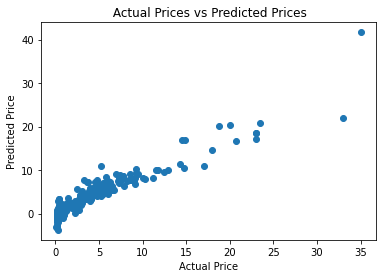

In [47]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price" , )
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

# prediction on Test data


In [48]:
y_pred = model.predict(x_test)

In [49]:
error_score = metrics.r2_score(y_test, y_pred)
print("R squared Error : ", error_score)

R squared Error :  0.8401532365378388


In [51]:
print(np.column_stack((y_pred,y_test)))

[[10.39222503  9.65      ]
 [ 0.71269634  0.45      ]
 [ 4.26367425  4.75      ]
 [ 4.89542882  3.1       ]
 [ 9.84484784 11.45      ]
 [ 4.22631808  4.5       ]
 [ 7.1173891   2.95      ]
 [ 7.37327394  6.5       ]
 [ 0.1592961   0.27      ]
 [ 5.16712598  6.1       ]
 [ 6.20624893  6.7       ]
 [ 6.17414198  4.75      ]
 [ 2.11880837  0.35      ]
 [ 7.74045843  8.4       ]
 [ 1.92235986  2.55      ]
 [ 1.71406658  0.72      ]
 [ 2.02899942  0.75      ]
 [ 1.8536463   0.48      ]
 [ 9.35171759 11.25      ]
 [ 4.2546458   4.        ]
 [ 1.48996098  1.15      ]
 [ 9.14496453  8.25      ]
 [ 1.45846216  0.45      ]
 [ 9.63402658 10.9       ]
 [ 0.82165042  0.5       ]
 [ 8.07898502  7.45      ]
 [ 1.53763892  0.6       ]
 [-3.19873666  0.2       ]
 [ 4.22373915  2.9       ]
 [ 2.09526116  2.85      ]
 [ 3.42865389  0.45      ]
 [ 3.72427545  2.75      ]
 [ 5.58001877  5.25      ]
 [ 7.75879392  9.7       ]
 [-1.91563192  0.2       ]
 [ 6.80980082  5.95      ]
 [ 8.20694812  8.35      ]
 

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

### Here LinearRegression is performing quite well as  R Squared value is 84%.

## Model 2- Lasso

### Lasso regression is a method we can use to fit a regression model when multicollinearity is present in the data. In a nutshell, least squares regression tries to find coefficient estimates that minimize the sum of squared residuals (RSS): RSS = Σ (yi – ŷi)2

In [52]:
from sklearn.linear_model import Lasso
model1 = Lasso()
model1.fit(x_train,y_train)

Lasso()

In [53]:
y_pred1 = model1.predict(x_test)
# R squared Error
error_score = metrics.r2_score(y_test, y_pred1)
print("R squared Error : ", error_score)

R squared Error :  0.7686666650269864


### Here Lasso algorithm giving 76% Accuracy

# Hence we can use LinearRgression for predicting car price

# Running linear regression using statsmodels

In [56]:
X_train = sa.add_constant(x_train) ## let's add an intercept (beta_0) to our model
X_test  = sa.add_constant(x_test) 

In [57]:
data.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,0.053643,-0.039896,-0.000394,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,0.509467,-0.550724,0.367128,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.440415,-0.512030,0.348715,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.166801,-0.101419,0.162510,0.089216
Fuel_Type,0.053643,0.509467,0.440415,0.166801,1.000000,-0.352415,0.080466,-0.055705
Seller_Type,-0.039896,-0.550724,-0.512030,-0.101419,-0.352415,1.000000,-0.063240,0.124269
Transmission,-0.000394,0.367128,0.348715,0.162510,0.080466,-0.063240,1.000000,0.050316
Owner,-0.182104,-0.088344,0.008057,0.089216,-0.055705,0.124269,0.050316,1.000000


In [58]:
#  Ordinary Least Squares.

lm2 = sa.OLS(y_train, X_train).fit() 

In [59]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     252.1
Date:                Sat, 06 Aug 2022   Prob (F-statistic):          1.20e-104
Time:                        10:40:24   Log-Likelihood:                -480.40
No. Observations:                 240   AIC:                             976.8
Df Residuals:                     232   BIC:                             1005.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7246      0.118     40.182      0.000       4.493       4.956
x1             1.2176      0.143      8.513      0.000       0.936       1.499
x2             3.9388      0.155     25.466      0.000       3.634       4.244
x3            -0.2368      0.143     -1.652      0.100      -0.519       0.046
x4             0.7558      0.136      5.542      0.000       0.487       1.025
x5            -0.5017      0.139     -3.602      0.000      -0.776      -0.227
x6             0.5223      0.127      4.111      0.000       0.272       0.773
x7            -0.2324      0.121     -1.924      0.056      -0.470       0.006
==============================================================================
Omnibus:                       83.570   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              574.329
Skew:                           1.177   Prob(JB):                    1.93e-125
Kurtosis:                      10.203   Cond. No.                         2.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
y_pred1 = lm2.predict(X_test) 

In [61]:
error_score = metrics.r2_score(y_test,y_pred1 )
print("R squared Error : ", error_score)

R squared Error :  0.8401532365378386


### Interpritation: Our stat model is also giving 84% Acuracy on my Test data 

# Limitations

### 1) Dataset contains less Records in tis case our model May give less Accuracy in Real World Scenario 
### 2) We can use this Model to get approximate Selling Price
### 3) we are not able to give here exact condition of car (we need more independent variable to predict more Accurate)

# Advantages

### 1) Using this platform any one can easily buy and sell cars. 
### 2) Seller can get more profit here as algoritham gives approximate SP so that seller can set his Sell price Accordingly.
### 3) with More number of Records we can set Best Selling Price here. (e.g Image of car, Engine Rating by Mechanic ets.)
### 4) we can make Mobile Application using this model so Any individual can use.

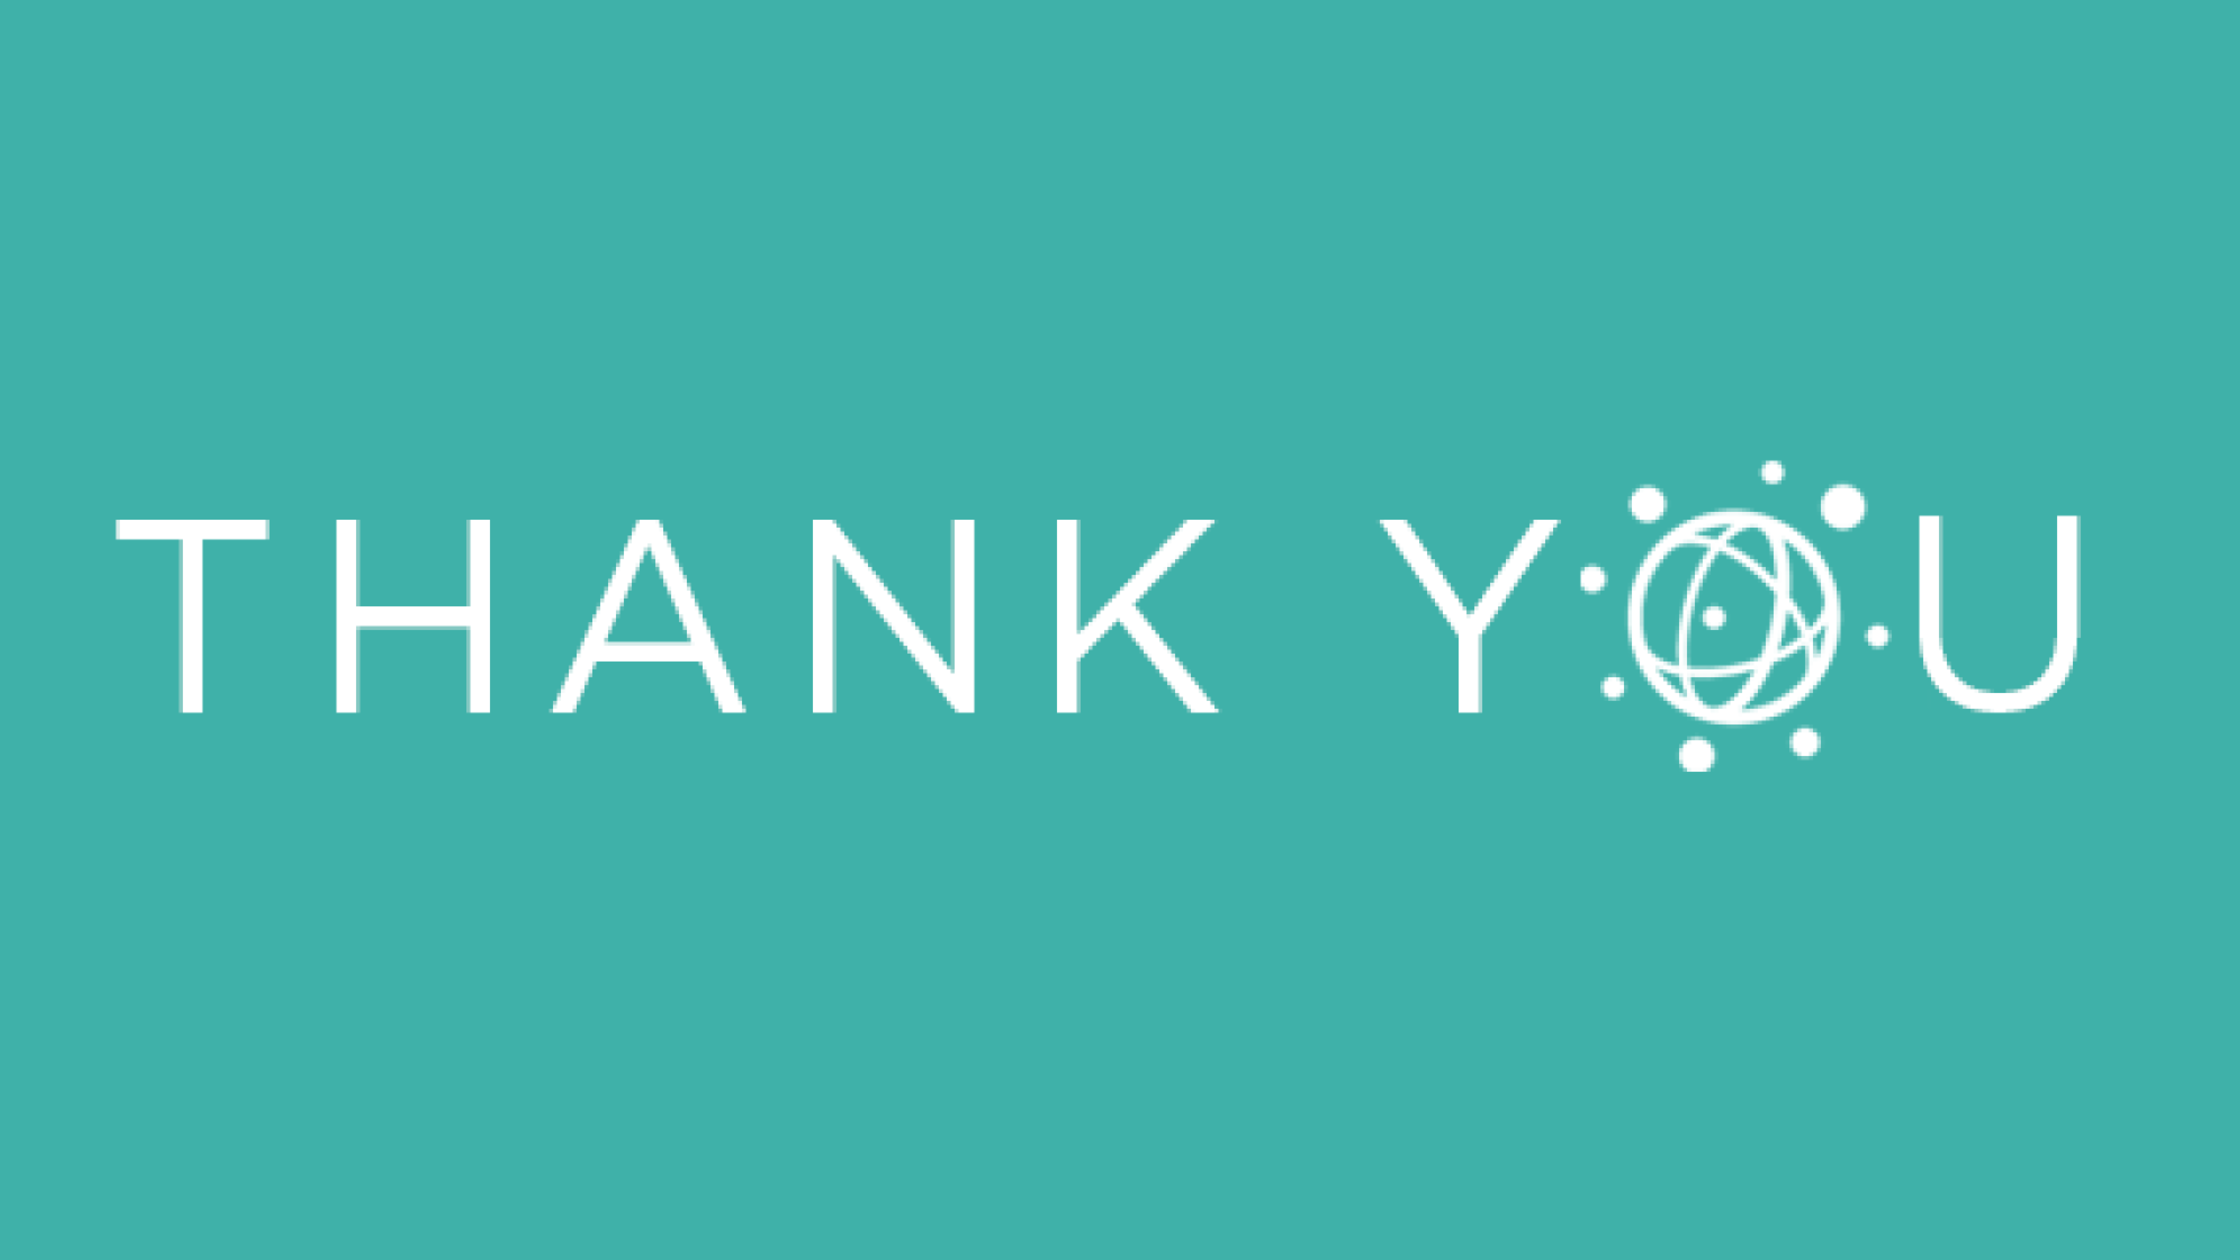